In [27]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score
from random import sample
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import time

## Read in the train feature and train label file

In [28]:
data = pd.ExcelFile('M. musculus_Constructed_RFInput.xlsx')
data

In [29]:
# trainX

dataTrainFeature = data.parse(data.sheet_names[3])
dataTrainFeature

,n_A,n_C,n_G,n_T,u_A,u_C,u_G,u_T,d_A,d_C,...,CGA.1,CGG.1,AGT.1,AGC.1,AGA.1,AGG.1,GGT.1,GGC.1,GGA.1,GGG.1
0,0.326392,0.448587,0.417355,0.376497,0.353800,0.413755,0.410101,0.378878,0.378005,0.381980,...,1.778552,3.049156,3.021475,2.417268,2.458653,2.765714,3.545550,3.244993,2.976785,3.478319
1,1.217187,1.590423,1.556191,1.207327,1.408850,1.362981,1.358021,1.350082,1.430679,1.331850,...,-0.102390,-0.170134,-0.122147,-0.152855,-0.141722,-0.099842,-0.128445,-0.170222,-0.074292,-0.134973
2,0.141948,0.385142,0.301133,0.128007,0.221153,0.225113,0.223671,0.225498,0.222336,0.206514,...,-0.086628,-0.293893,-0.321026,-0.292861,-0.255400,-0.350610,-0.389194,-0.288246,-0.355680,-0.397429
3,0.141948,0.385142,0.301133,0.128007,0.221153,0.225113,0.223671,0.225498,0.222336,0.206514,...,-0.464918,-0.423371,-0.433725,-0.458703,-0.482078,-0.459750,-0.441202,-0.408144,-0.462906,-0.435856
4,5.750749,5.438396,5.314102,5.526218,5.473293,5.771874,5.696210,5.316173,5.279176,5.720657,...,-0.296789,-0.302212,-0.310420,-0.292028,-0.233070,-0.311522,-0.316527,-0.296364,-0.269249,-0.292139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,-0.481032,-0.526478,-0.532859,-0.487178,-0.503260,-0.504608,-0.504952,-0.506469,-0.498578,-0.514519,...,-0.028834,-0.135294,-0.133417,-0.114520,-0.149166,-0.101365,-0.087837,-0.147741,-0.099636,-0.053892
574,-0.411256,-0.459203,-0.455191,-0.412401,-0.434577,-0.431178,-0.433633,-0.430406,-0.424931,-0.433484,...,-0.370345,-0.394772,-0.376050,-0.414534,-0.408323,-0.353655,-0.391332,-0.366304,-0.397270,-0.410110
575,-0.347188,-0.399089,-0.399235,-0.345504,-0.368185,-0.369544,-0.370784,-0.371326,-0.358907,-0.374394,...,-0.443902,-0.428051,-0.425107,-0.412034,-0.443509,-0.463303,-0.451176,-0.421258,-0.448609,-0.476973
576,-0.309799,-0.268287,-0.324920,-0.340270,-0.309957,-0.315844,-0.321427,-0.309985,-0.323398,-0.308805,...,-0.196962,-0.047415,-0.053202,-0.071184,-0.048344,-0.033343,-0.053640,-0.042830,-0.095087,-0.078101


In [30]:
# trainY

dataTrainLabel = data.parse(data.sheet_names[0])
dataTrainLabel

,label
0,1
1,1
2,1
3,1
4,1
...,...
573,0
574,0
575,0
576,0


In [31]:
# testX

dataTestLabel = data.parse(data.sheet_names[1])
dataTestLabel

,label
0,1
1,1
2,1
3,1
4,1
...,...
111,0
112,0
113,0
114,0


In [32]:
# testY

dataTestFeature = data.parse(data.sheet_names[2])
dataTestFeature

,n_A,n_C,n_G,n_T,u_A,u_C,u_G,u_T,d_A,d_C,...,CGA.1,CGG.1,AGT.1,AGC.1,AGA.1,AGG.1,GGT.1,GGC.1,GGA.1,GGG.1
0,-0.079757,-0.032493,-0.067730,-0.090055,-0.064322,-0.088827,-0.068759,-0.061979,-0.081177,-0.077503,...,-0.512204,-0.471211,-0.472175,-0.505372,-0.526061,-0.498837,-0.447614,-0.453105,-0.492799,-0.486964
1,-0.279657,-0.186025,-0.197682,-0.256980,-0.240183,-0.230312,-0.235686,-0.237808,-0.240315,-0.236576,...,-0.186454,-0.177414,-0.175844,-0.060350,-0.005715,-0.131315,-0.302278,-0.197074,-0.140577,-0.294445
2,0.774034,0.921008,0.903158,0.797089,0.860663,0.832516,0.851099,0.825459,0.817033,0.889360,...,-0.270519,-0.279853,-0.226227,-0.270360,-0.279759,-0.195783,-0.135570,-0.233917,-0.174370,-0.146116
3,4.108326,5.172295,5.243379,4.272610,4.615838,4.784163,4.687492,4.500982,4.652144,4.646319,...,-0.102390,-0.170134,-0.122147,-0.152855,-0.141722,-0.099842,-0.128445,-0.170222,-0.074292,-0.134973
4,1.122720,1.299344,1.367250,1.153660,1.196827,1.258160,1.264947,1.192804,1.192258,1.242257,...,-0.412378,-0.384372,-0.398589,-0.389533,-0.414413,-0.427261,-0.434077,-0.390034,-0.431063,-0.441236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,-0.474426,-0.509826,-0.511147,-0.485337,-0.492588,-0.495527,-0.491620,-0.497114,-0.487801,-0.496809,...,-0.391361,-0.323532,-0.334285,-0.355364,-0.358928,-0.327259,-0.228186,-0.278879,-0.305641,-0.210289
112,-0.433574,-0.482683,-0.498215,-0.443980,-0.458548,-0.468510,-0.468235,-0.456709,-0.448189,-0.479364,...,-0.391361,-0.323532,-0.334285,-0.355364,-0.358928,-0.327259,-0.228186,-0.278879,-0.305641,-0.210289
113,-0.181022,-0.115254,-0.106364,-0.224136,-0.163738,-0.167642,-0.158041,-0.168470,-0.173022,-0.154631,...,-0.128660,-0.180534,-0.144687,-0.207024,-0.176232,-0.184108,-0.143406,-0.181462,-0.148375,-0.154570
114,-0.440372,-0.482433,-0.483448,-0.452090,-0.463355,-0.461661,-0.460860,-0.466971,-0.459294,-0.462022,...,-0.065612,-0.070815,-0.064472,-0.037016,-0.009775,-0.021667,-0.095674,-0.109024,-0.084689,-0.089244


## PCA plot to visualise distribution of samples between two groups

In [33]:

trainX = dataTrainFeature
trainY = dataTrainLabel
testX = dataTestFeature
testY = dataTestLabel

Train = pd.concat([trainX, trainY],axis=1)
Test = pd.concat([testX, testY], axis = 1)

In [34]:
int(trainY.values[500])

0

In [35]:

matrixTrain = trainX
matrixTrain = StandardScaler().fit_transform(matrixTrain)
trainDF = pd.DataFrame(matrixTrain)
df2C = PCA(n_components = 2)
trainDF2 = df2C.fit_transform(matrixTrain)
trainDF2Plot = pd.DataFrame(data = trainDF2, columns = ['PCA1', 'PCA2'])



In [36]:
trainDF2Plot

,PCA1,PCA2
0,21.667974,16.574237
1,8.870042,-10.428509
2,-0.130800,-3.599043
3,-1.278897,-4.726049
4,33.671870,-37.604509
...,...,...
573,-4.380776,2.645398
574,-5.639608,0.355995
575,-5.422320,-0.259587
576,-2.639847,1.664357


<Figure size 432x288 with 0 Axes>

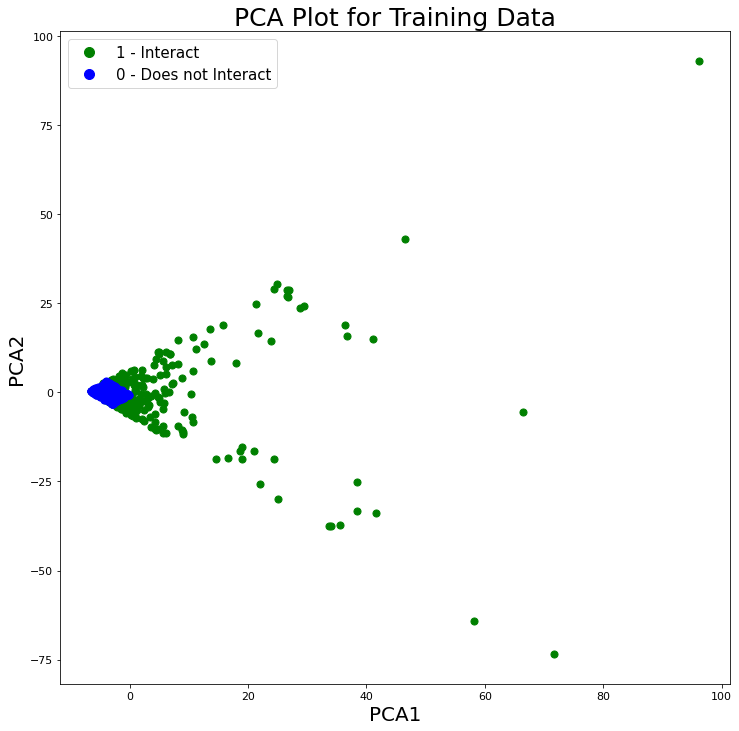

In [37]:
# PCA Plot for Train Data
plt.figure()
plt.figure(figsize = (12,12))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("PCA1", fontsize=20)
plt.ylabel("PCA2",fontsize=20)


labels = [1,0]
colors = ['g','b']
for label,color in zip(labels, colors):
    for index in range(len(trainY.values)):
    #print(index)
        if label == int((trainY.values)[index]):
      #print((trainY.values)[index])
          plt.scatter(trainDF2Plot["PCA1"][index], trainDF2Plot["PCA2"][index],c= color ,s = 50)

p1 = mlines.Line2D([], [], color='green', marker='o', linestyle='None',
                          markersize=10, label='1 - Interact')

p2 = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=10, label='0 - Does not Interact')

plt.title('PCA Plot for Training Data', fontsize=25)
plt.legend(handles = [p1,p2], fontsize=15)
plt.show()

In [38]:

matrixTest = testX
matrixTest = StandardScaler().fit_transform(matrixTest)
testDF = pd.DataFrame(matrixTest)
df2C = PCA(n_components = 2)
testDF2 = df2C.fit_transform(matrixTest)
testDF2Plot = pd.DataFrame(data = testDF2, columns = ['PCA1', 'PCA2'])



<Figure size 432x288 with 0 Axes>

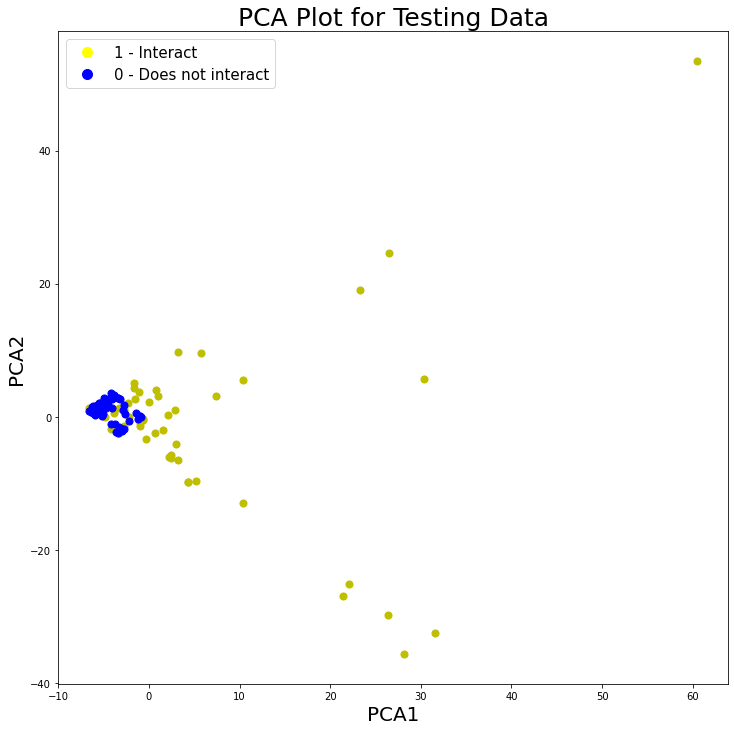

In [39]:
# PCA Plot for Test Data
plt.figure()
plt.figure(figsize = (12,12))

plt.xlabel("PCA1", fontsize =20)
plt.ylabel("PCA2", fontsize =20)


labels = [1,0]
colors = ['y','b']
for label,color in zip(labels, colors):
    for index in range(len(testY.values)):
        if label == int((testY.values)[index]):
            plt.scatter(testDF2Plot["PCA1"][index], testDF2Plot["PCA2"][index],c= color ,s = 50)

p1 = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None',
                          markersize=10, label='1 - Interact')

p2 = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=10, label='0 - Does not interact')


plt.title('PCA Plot for Testing Data', fontsize=25)
plt.legend(handles = [p1,p2], fontsize=15)
plt.show()

## Active-Learning Query-By-Committee

In [40]:



def QBCPick(train, test, n_instances=1, beta=1):
    
    indicesList = test.index
    
    trainX = train[train.columns[:-1]].to_numpy()
    trainY = train[train.columns[-1]].to_numpy()
    testX = test[test.columns[:-1]].to_numpy()
    testY = test[test.columns[-1]].to_numpy()

    rf = RandomForestClassifier()
    rf.fit(trainX, trainY)

    all_probs = rf.predict_proba(testX)

    # Calculate confidence as 1 - max(probability)
    confs = [1 - np.max(x_prob) for x_prob in all_probs]

    qbc_values = []

    distances = euclidean_distances(testX)

    for i in range(len(testX)):

        sim_score_sum = np.sum(distances[i]) - distances[i][i]
        total_value = (((1 / len(testX)) * sim_score_sum) ** beta) * confs[i]
        qbc_values.append(total_value)

    # Get indices of the top n_instances points with the highest QBC values
    qbc_indices = np.argsort(qbc_values)[-n_instances:][0]

    return indicesList[qbc_indices]





In [41]:

trainX = dataTrainFeature
trainY = dataTrainLabel
testX = dataTestFeature
testY = dataTestLabel

Train = pd.concat([trainX, trainY],axis=1)
Test = pd.concat([testX, testY], axis = 1)

In [42]:
start = time.time()
accuracyTrainAverageQBC = []
accuracyTestAverageQBC = []
accuracyTrainSDQBC = []
accuracyTestSDQBC = []

train = Train
test = Test
chosenQBC = []

for random in range(30):


    # implement Density Based Sampling

    pickMSRow = QBCPick(train, test,n_instances=1, beta=1)
    print(pickMSRow)
    
    train = pd.concat([train, test.loc[[pickMSRow]]], axis=0)
    test.drop(pickMSRow, inplace=True)
    chosenQBC.append(pickMSRow)


    lossTrainSubset = []
    lossTestSubset = []

    for i in range(5):  # 5 times for different random seeds
        # to have 5 folds to do cross validation

        kFold = KFold(n_splits = 5, shuffle = True, random_state = i+10)


        # run across 5 iterations / 5 folds
        predictions = []
        actual = []


        trainX = train[train.columns[:-1]].to_numpy()
        trainY = train[train.columns[-1]].to_numpy()

        testX = test[test.columns[:-1]].to_numpy()
        testY = test[test.columns[-1]].to_numpy()

        for trainIndex, valIndex in kFold.split(trainX):
            xTrain, xVal = trainX[trainIndex], trainX[valIndex]
            yTrain, yVal = trainY[trainIndex], trainY[valIndex]
            rf = RandomForestClassifier()
            rf.fit(xTrain, yTrain)
            yPred = rf.predict(xVal)
            predictions += yPred.tolist()
            actual += yVal.tolist()

        loss = accuracy_score(actual,predictions)
        lossTrainSubset.append(loss)

        rf.fit(trainX, trainY)
        predictTest = rf.predict(testX)
        lossTest = accuracy_score(predictTest, testY.tolist())

        lossTestSubset.append(lossTest)

    accuracyTrainAverageQBC.append(np.mean(lossTrainSubset))
    accuracyTrainSDQBC.append(np.std(lossTrainSubset))
    print(np.mean(lossTrainSubset))
    print(np.std(lossTrainSubset))
    accuracyTestAverageQBC.append(np.mean(lossTestSubset))
    accuracyTestSDQBC.append(np.std(lossTestSubset))
end = time.time()

elapsed = end-start
print(elapsed)

29
0.9630397236614853
0.004582555841596393
27
0.9644827586206898
0.004166567577101563
55
0.9628227194492254
0.004435145861179072
15
0.961168384879725
0.005498281786941562
23
0.9643224699828474
0.00439322417662634
34
0.9640410958904109
0.004594660227739312
1
0.9627350427350427
0.0033146528939598714
25
0.962457337883959
0.00457897879351493
46
0.9635434412265758
0.0033383165148663445
11
0.9629251700680271
0.004975761509635296
53
0.965704584040747
0.002920993299505164
19
0.9647457627118644
0.004958894521467039
50
0.9634517766497461
0.0054145516074450145
0
0.9611486486486486
0.007629452561240699
81
0.9605396290050591
0.004721753794266434
61
0.9622895622895623
0.005593686102975162
41
0.9616806722689075
0.005956317696359463
67
0.963758389261745
0.004323523062659444
21
0.9614740368509211
0.006085729354969847
47
0.9638795986622075
0.003900302270799529
35
0.9639398998330551
0.0038937909147547765
17
0.9666666666666666
0.0027888667551135833
66
0.9637271214642263
0.003393690192075062
54
0.963787375

In [43]:
trainX = dataTrainFeature
trainY = dataTrainLabel
testX = dataTestFeature
testY = dataTestLabel

Train = pd.concat([trainX, trainY],axis=1)
Test = pd.concat([testX, testY], axis = 1)

<Figure size 432x288 with 0 Axes>

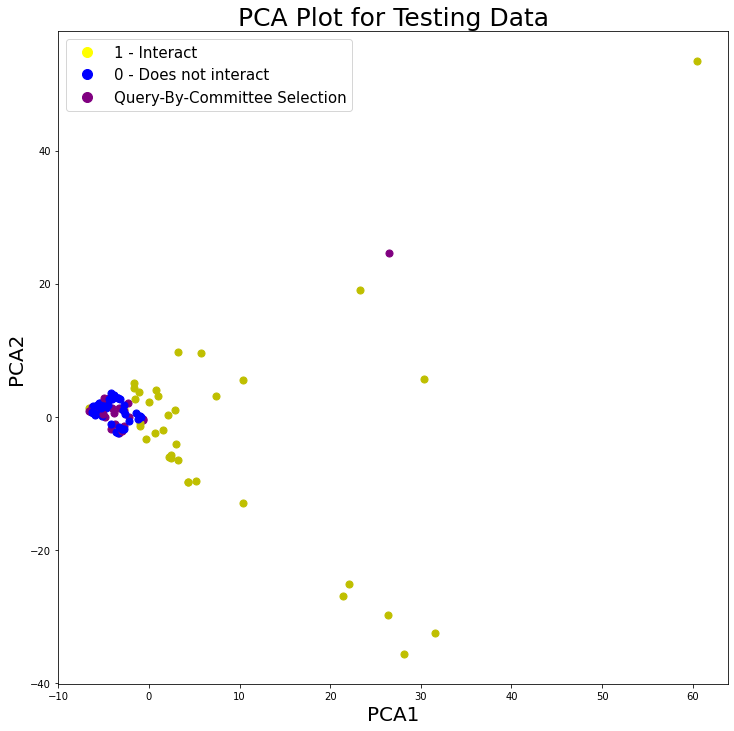

In [44]:

# color the points chosen by QBC

plt.figure()
plt.figure(figsize = (12,12))

plt.xlabel("PCA1", fontsize =20)
plt.ylabel("PCA2", fontsize =20)


labels = [1,0]
colors = ['y','b']
for label,color in zip(labels, colors):
    for index in range(len(testY.values)):
    #print(index)
        if label == int((testY.values)[index]) and index in chosenQBC:
            plt.scatter(testDF2Plot["PCA1"][index], testDF2Plot["PCA2"][index],c= 'purple' ,s = 50)
        elif label == int((testY.values)[index]) and index not in chosenQBC:
            plt.scatter(testDF2Plot["PCA1"][index], testDF2Plot["PCA2"][index],c= color ,s = 50)

p1 = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None',
                          markersize=10, label='1 - Interact')

p2 = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=10, label='0 - Does not interact')

p3 = mlines.Line2D([], [], color='purple', marker='o', linestyle='None',
                          markersize=10, label='Query-By-Committee Selection')


plt.title('PCA Plot for Testing Data', fontsize=25)
plt.legend(handles = [p1,p2,p3], fontsize=15)
plt.show()

Text(0, 0.5, 'Accuracy Value')

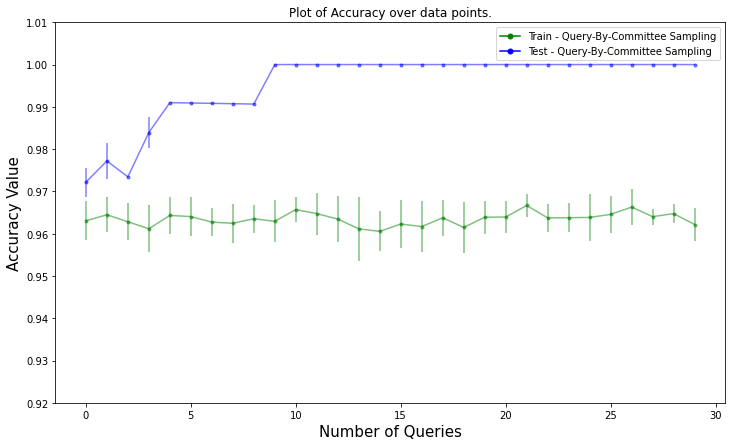

In [45]:
# plot the graph

plt.figure(figsize=(12,7))

point = [i for i in range(30)]

plt.errorbar(point,accuracyTrainAverageQBC, accuracyTrainSDQBC,linestyle='-', marker='.', color='green', alpha = 0.5)
plt.errorbar(point,accuracyTestAverageQBC, accuracyTestSDQBC,linestyle='-', marker='.', color='blue', alpha = 0.5)

plt.title("Plot of Accuracy over data points.")


p1 = mlines.Line2D([], [], color='green', marker='.', linestyle='-',
                          markersize=10, label='Train - Query-By-Committee Sampling')

p2 = mlines.Line2D([], [], color='blue', marker='.', linestyle='-',
                          markersize=10, label='Test - Query-By-Committee Sampling')

plt.ylim(0.92,1.01)

plt.legend(handles=[p1,p2])



plt.xlabel("Number of Queries",size =15)
plt.ylabel("Accuracy Value",size=15)

In [46]:

info = ['accuracyTrainAverageQBC','accuracyTestAverageQBC','accuracyTrainSDQBC','accuracyTestSDQBC']
with open('QBC.txt','w') as file:
    for name, data in zip(info, [accuracyTrainAverageQBC,accuracyTestAverageQBC,accuracyTrainSDQBC,accuracyTestSDQBC]):
        file.write(f"{name}:\n")
        for item in data:
            file.write(f"{item}\n")
        file.write('\n')